## Ejercicios con series de tiempo: 
### Generar estadisticas a partir de datos de vientos

1. Los datos tienen la siguiente estructura:

` 61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04`<br>
` 61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83`<br>
` 61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71`<br>

Las primeras 3 columnas son año, mes y dia. El resto de las 12 columnas son velocidades de viento promediades en nudos en 12 distintos puntos en Irlanda en ese momento.

El archivo que contiene nuestro datos esta en: `wind.data`

Locaciones: RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, MAL

In [1]:
%cat data/wind.data

61  1  1 15.04 14.96 13.17  9.29 13.96  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71 16.88 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25  8.04  8.50  7.67 12.75 12.71
61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  8.63  1.79  5.83  5.88  5.46 10.88
61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 11.92  6.54 10.92 10.34 12.92 11.83
61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 10.67  4.42  7.17  7.50  8.12 13.17
61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  9.17  9.29  7.58  7.96 13.96 13.79
61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 14.29  7.62  9.25 10.46 16.62 16.46
61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  8.04 10.13  7.79  9.08 13.04 15.37
61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 11.42  7.79  8.54  9.00  8.58 11.83
61  1 11 10.58  9.87  8.42  2.79  8.71  7.25  7.54  8.33  5.71  8.67 20.71 16.92
61  1 12 19.75 12.08 18.50 10.54 10.29  9.46 15.54 11.50 10.37 14.58 15.59 14.09
61  1 13  9.92  3.54  8.46  

In [2]:
# importamos numpy con la convencion
import numpy as np

# Nombres de las posiciones en una lista
locations = ["RPT", "VAL", "ROS", "KIL", "SHA", "BIR", "DUB", "CLA", "MUL", "CLO", "BEL", "MAL"]

# Datos completos del archivo wind.data
data_raw = np.loadtxt('data/wind.data')

# Vista a datos de vientos, no incluyendo las primeras 3 columnas de fecha
wind_data = data_raw[:,3:]

In [3]:
wind_data.shape

(6574, 12)

### Graficar todas las series

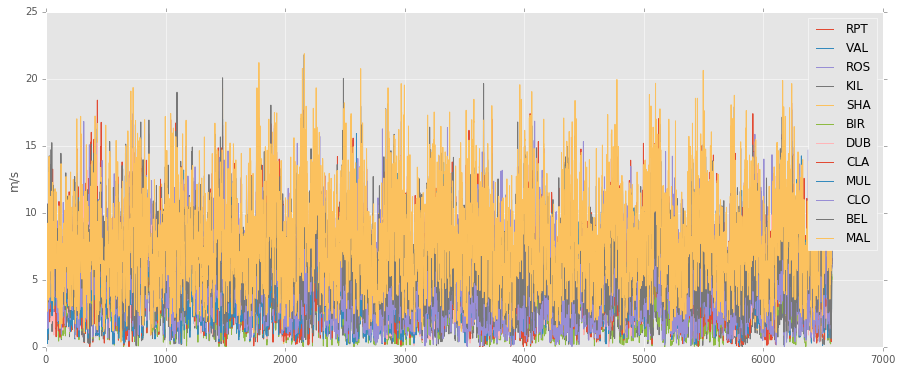

In [10]:
# Importamos la funcionalidad de matplotlib, y el graficado inline
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib qt
#plt.style.use('ggplot')

# Nueva figura
plt.figure(figsize=(15,6)) 

# Para cada serie un plot.
for idx,lname in enumerate(locations):
    plt.plot(wind_data[:,idx] * 0.514444, label=lname)   # a m/s 
    
plt.ylabel('m/s')    
plt.legend()    

#plt.show()

1961-01-01 00:00:00 1978-12-31 00:00:00


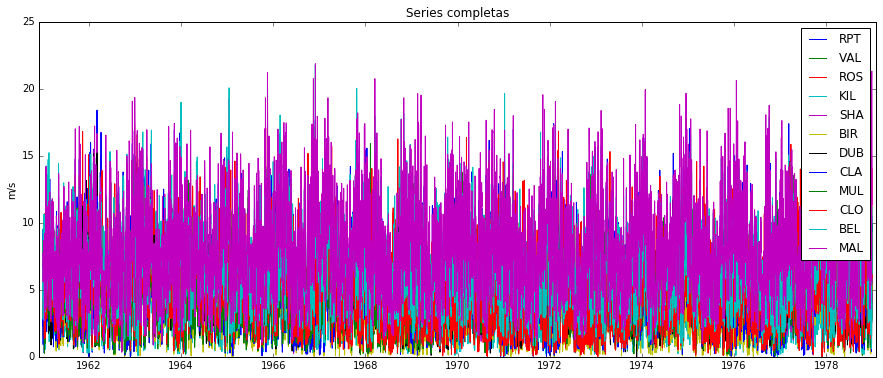

In [5]:
# eje x con rango de fechas

from matplotlib.dates import drange   # Modulo rango fechas de matplotlib
import datetime as dt                 # objeto para manipular fechas de python

# Fecha de inicio de la serie y final
startd = dt.datetime(1900 + int(data_raw[0,0]),
                     int(data_raw[0,1]), 
                     int(data_raw[0,2]))        
# Fecha final
endd = dt.datetime(1900 + int(data_raw[-1,0]),
                   int(data_raw[-1,1]), 
                   int(data_raw[-1,2])) + dt.timedelta(days=1) 

# Rango de fechas en el formato de matplotlib   (start,end,step)
mpl_dr = drange(startd, endd, dt.timedelta(days=1) )


print (startd, endd)


plt.figure(figsize=(15,6)) 

for idx,lname in enumerate(locations[:]):
    plt.plot_date(mpl_dr, wind_data[:,idx] * 0.514444, fmt='-', label=lname)
    
plt.xlim([startd-dt.timedelta(days=30), endd+dt.timedelta(days=30)])
plt.ylabel('m/s')    

plt.legend()  
plt.title("Series completas")


### Estadisticas sobre todos los valores de la matriz

In [8]:
wind_data.min()

0.0

In [9]:
wind_data.max()

42.539999999999999

In [10]:
wind_data.mean()

10.22837377040868

In [11]:
wind_data.std()

5.6038401810957934

### Generar estadisticas de todos los dias de datos para cada locación

In [12]:
# Especificamos que haga la operacion pero sobre la primera 
# dimension, en este caso los renglones
wdmax = wind_data.max(axis=0)
wdmax

array([ 35.8 ,  33.37,  33.84,  28.46,  37.54,  26.16,  30.37,  31.08,
        25.88,  28.21,  42.38,  42.54])

In [13]:
wdmin = wind_data.min(axis=0)

In [14]:
wdmean = wind_data.mean(axis=0)

In [15]:
wdstd= wind_data.std(axis=0)

(0, 13)

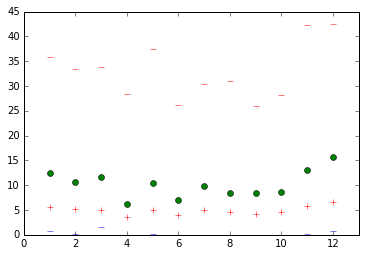

In [18]:
# Graficamos los datos
x = np.arange(1,13)

plt.plot(x,wdmean,'og', x,wdmax,'_r' , x,wdmin,'_b' , x,wdstd ,'+r')
# Marcador og : circulo verde     ; _r Underscore red   ;  _b : Underscore blue

plt.xlim([0,13])

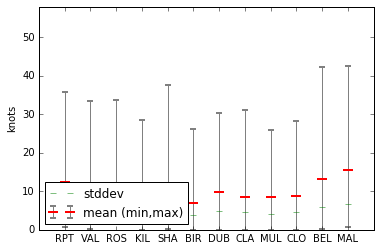

In [27]:
x = np.arange(1,13)

plt.xticks(x,locations)

plt.errorbar(x , wdmean, yerr=[ wdmean-wdmin, wdmax-wdmean ] , 
             fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=10 , label='mean (min,max)' )

plt.plot(x,wdstd,'_g', label='stddev')

plt.ylim([0,58])
plt.xlim([0,13])

plt.ylabel('knots')
plt.legend(loc='lower left')

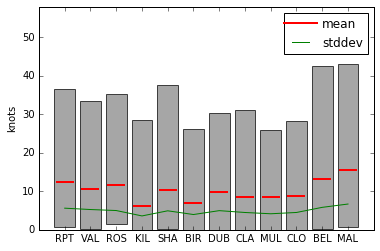

In [219]:
## Otro tipo de grafica

x = np.linspace(1,12,12)

plt.xticks(btm,locations)
plt.bar(x,wdmax,align='center',bottom=wdmin, color='gray', alpha=0.7)
plt.plot(x,wdmean,'_r',markersize=18, markeredgewidth=2,label="mean")
plt.plot(x,wdstd,'g', label='stddev')

plt.ylim([0,58])
plt.xlim([0,13])

plt.ylabel('knots')
plt.legend(loc='upper right')

### Generar estadisticas de sobre todas las posiciones para cada dia.

In [28]:
# Las mismas operaciones, aplicando sobre la segunda dimension
wdpmin = wind_data.min(axis=1)
wdpmin.shape

(6574,)

In [29]:
wind_data.mean(axis=1)

array([ 13.09666667,  11.79833333,  11.34166667, ...,  14.89      ,
        15.3675    ,  15.4025    ])

In [30]:
# Los valores maximos, sobre columnas
wind_data.max(axis=1)
# Los indices, que contienen los valores maximos 
wind_data.argmax(axis=1)

array([10, 10,  0, ..., 11, 11,  2])

### Obtener la fecha que tuvo la lectura maxima

In [32]:
# Diarios maximos para cada dia (sobre renglones) todas las posiciones
days_max = wind_data.max(axis=1)

# Indice del dia con valor maximo 
max_row = days_max.argmax()


In [33]:
# Fecha del dia con valor maximo
print ("19%d - %02d - %02d" %  
       ( int(data_raw[max_row, 0]) , int(data_raw[max_row, 1]) , int(data_raw[max_row, 2]) ) )
print ("Con valor maximo: %f" % days_max.max())

1966 - 12 - 02
Con valor maximo: 42.540000


### Estadisticas de mayo

In [35]:
may_indices = data_raw[:,1] == 5
may_indices.size

6574

In [37]:
may_data = wind_data[may_indices]
may_data.shape

(558, 12)

In [42]:
# Definir funcion para graficar una serie

def plotstats(serie, title):
    x = np.linspace(1,serie.shape[1],serie.shape[1])

    plt.xticks(x,locations)
    plt.errorbar(x , serie.mean(axis=0), 
                 yerr=[ serie.mean(axis=0)-serie.min(axis=0), serie.max(axis=0)-serie.mean(axis=0) ] , 
                 fmt='_r' , ecolor='gray' , markeredgewidth=2 , markersize=15 , label='mean (min,max)' )

    plt.plot(x,serie.std(axis=0),'_g', label='stddev')

    plt.ylim([0,58])
    plt.xlim([0,13])

    plt.title(title)
    plt.ylabel('knots')
    plt.legend(loc='upper right')    

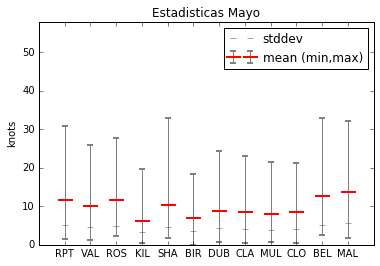

In [43]:
plotstats(may_data, 'Estadisticas Mayo')

### Estadisticas por mes

In [44]:
month_group = {'min' : np.zeros(12) , 'max' : np.zeros(12) , 
               'mean' : np.zeros(12), 'std' : np.zeros(12) } 

for m in range(12): 
    wind_data_bymonth = wind_data[data_raw[:,1] == (m+1)]
    month_group['min'][m] = wind_data_bymonth.min() 
    month_group['max'][m] = wind_data_bymonth.max() 
    month_group['mean'][m] = wind_data_bymonth.mean() 
    month_group['std'][m] = wind_data_bymonth.std()     


In [45]:
import datetime as dt
xticksmonths = [ dt.datetime(1900,m+1,1).strftime('%b') for m in range(12)]

xticksmonths

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

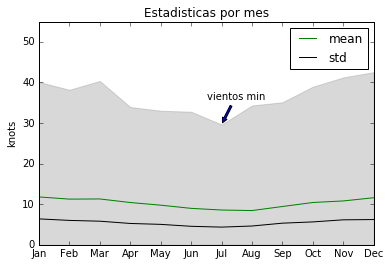

In [46]:
x = np.arange(12)

plt.plot(x, month_group['mean'] , '-g', label='mean' , )    

plt.fill_between(x , month_group['min'] , month_group['max'], color='gray', alpha=0.3, edgecolor='red') 


plt.plot(x, month_group['std'], '-k' ,label='std')  



plt.xticks(x,xticksmonths)
plt.ylabel('knots')
plt.legend()
plt.xlim([0,11])
plt.ylim([0,55])





# Anotacion
plt.annotate('vientos min' , xy=(month_group['max'].argmin(),month_group['max'].min()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, 25), textcoords='offset points',)




plt.title('Estadisticas por mes')

### Estadisticas por dia del año

In [47]:
# Nueva columna yeardays, conteniendo en numero de dia del año que corresponde para cada observación
yd = np.arange(1,366)
colyeardays = np.tile(yd, int(np.ceil(len(data_raw)/365)))[0:len(data_raw)]
colyeardays.shape

(6574,)

In [48]:
dailywdt_mean = np.empty(365)
dailywdt_max = np.empty(365)
dailywdt_min = np.empty(365)
dailywdt_std = np.empty(365)

for d in range(1,366):
    dailywdt_mean[d-1] = wind_data[np.where(colyeardays==d)].mean()
    dailywdt_max[d-1] = wind_data[np.where(colyeardays==d)].max()
    dailywdt_min[d-1] = wind_data[np.where(colyeardays==d)].min()
    dailywdt_std[d-1] = wind_data[np.where(colyeardays==d)].std()


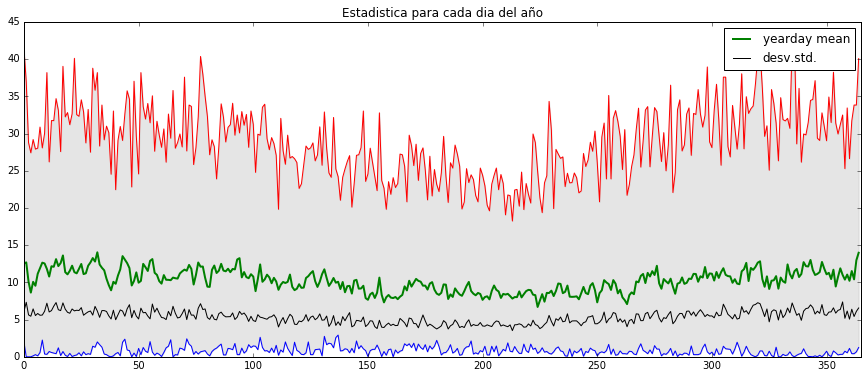

In [49]:
myfig = plt.figure(figsize=(15,6))    
x = np.arange(365)

plt.plot(x,dailywdt_mean,'-g',label='yearday mean', lw=2)
plt.plot(x,dailywdt_min, '-b')
plt.plot(x,dailywdt_max, '-r')
plt.plot(x,dailywdt_std, '-k',label='desv.std.')

plt.fill_between(x, dailywdt_min, dailywdt_max, color='gray', alpha=0.2)

plt.xlim([0,365])
plt.legend()
plt.title("Estadistica para cada dia del año")


(0, 16)

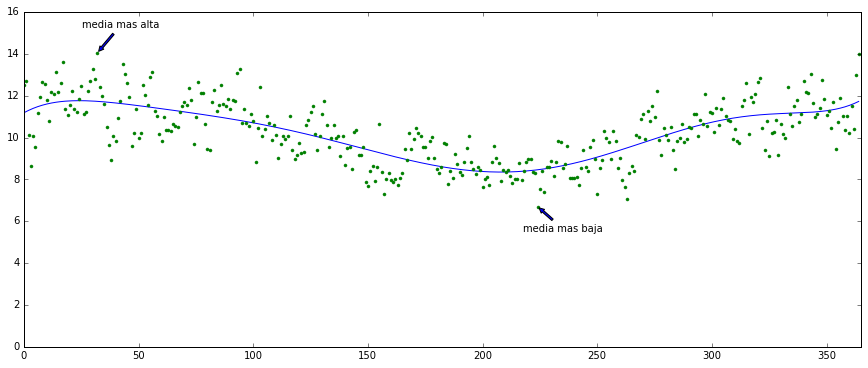

In [181]:
# Curva que se ajusta alos puntos medios diarios

plt.figure(figsize=(15,6)) 

plys = np.polyfit(np.arange(365),dailywdt_mean,8)
mfit = np.poly1d(plys)


plt.plot(np.arange(365),mfit(np.arange(365)), label='Curva de ajuste')

plt.plot(dailywdt_mean,'.g',label='yearday mean')

# Anotaciones
plt.annotate('media mas baja' , xy=(dailywdt_mean.argmin(),dailywdt_mean.min()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, -25), textcoords='offset points',)

plt.annotate('media mas alta' , xy=(dailywdt_mean.argmax(),dailywdt_mean.max()) , 
             arrowprops= dict(arrowstyle='simple') ,
             xytext=(-15, 25), textcoords='offset points',)

plt.xlim([0,365])
plt.ylim([0,16])

In [ ]:
|